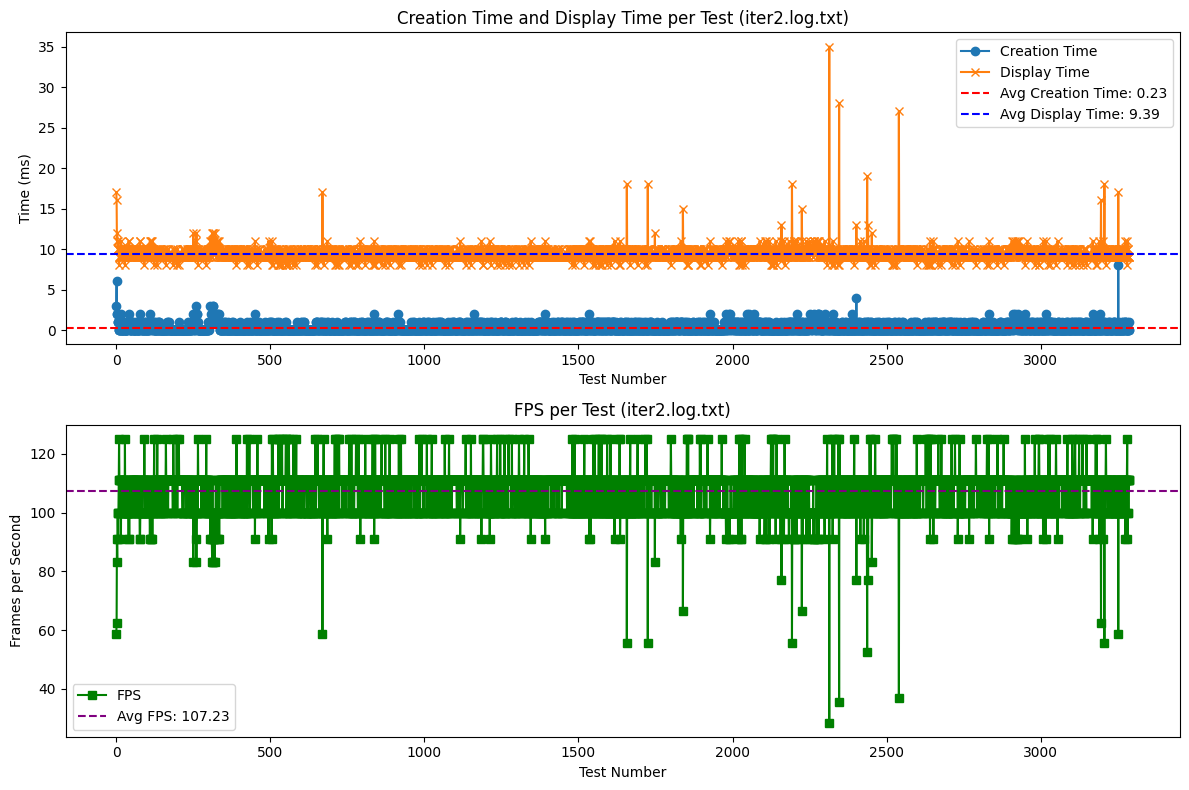

File: iter2.log.txt
Average Creation Time: 0.23 ms
Average Display Time: 9.39 ms
Average FPS: 107.23
----------------------------------------


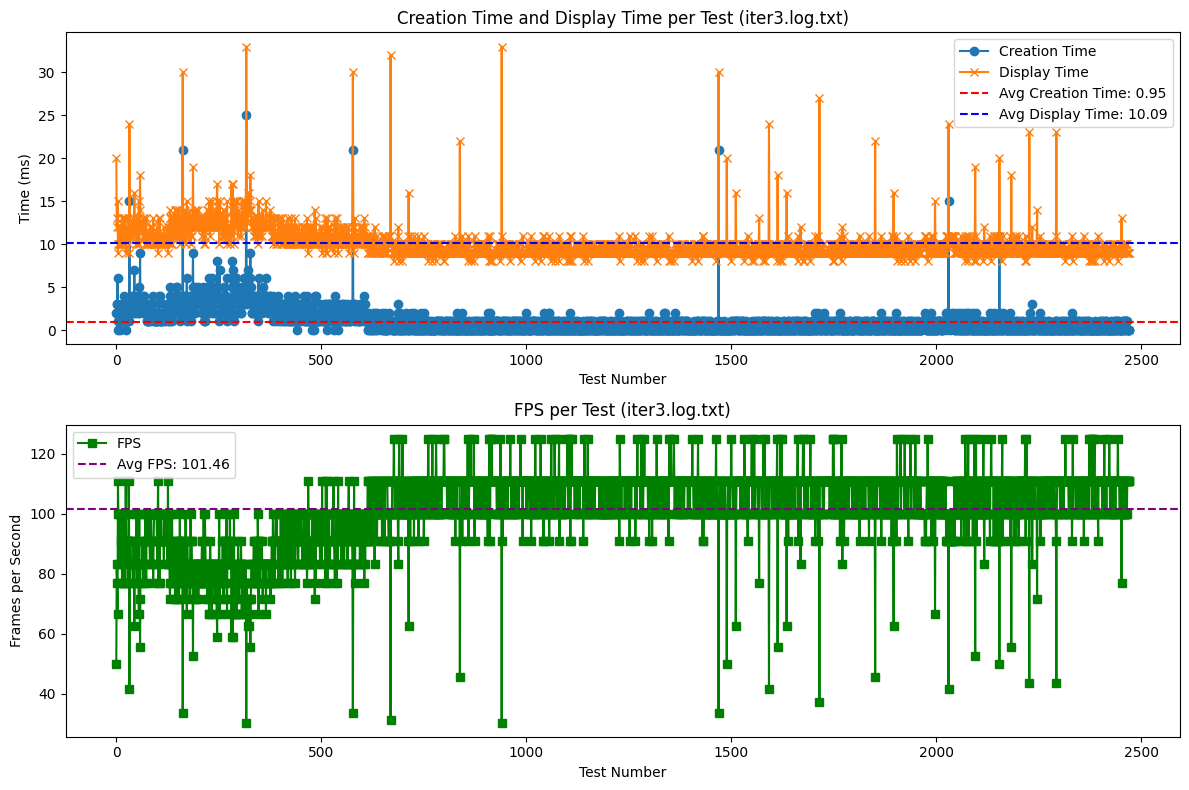

File: iter3.log.txt
Average Creation Time: 0.95 ms
Average Display Time: 10.09 ms
Average FPS: 101.46
----------------------------------------


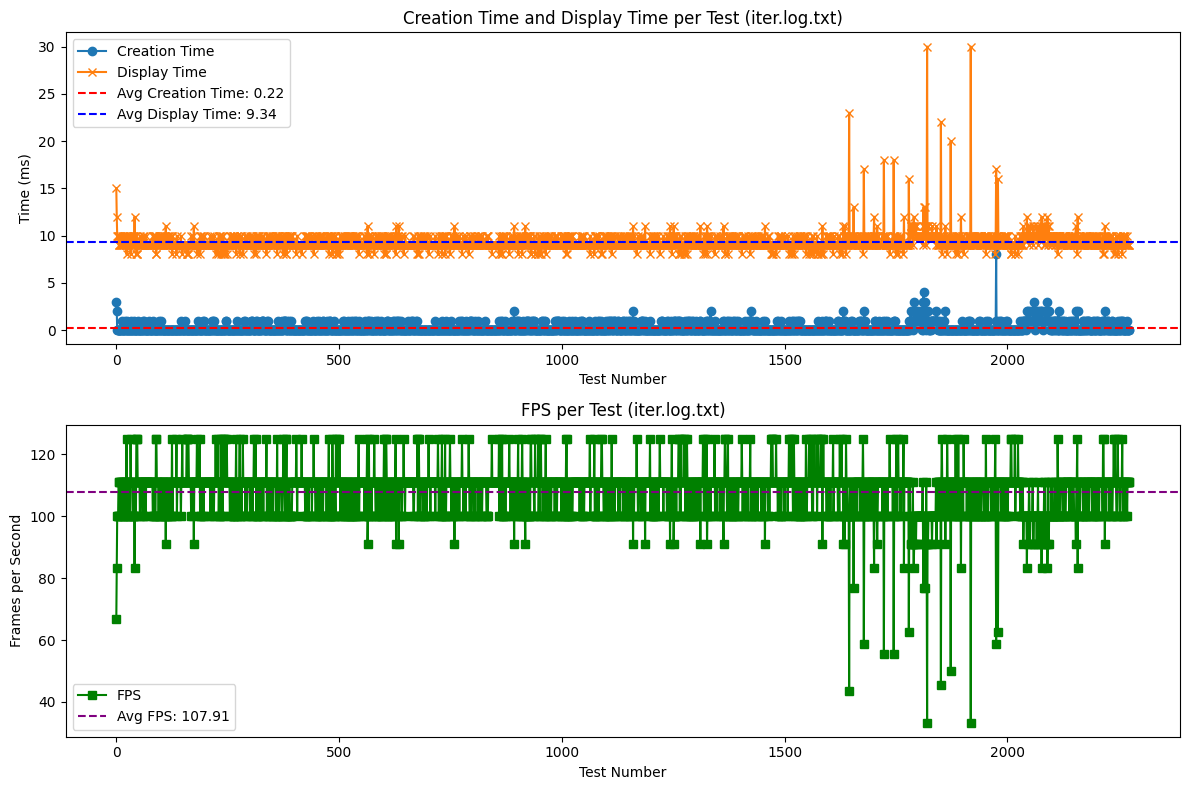

File: iter.log.txt
Average Creation Time: 0.22 ms
Average Display Time: 9.34 ms
Average FPS: 107.91
----------------------------------------


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Definir la ruta de la carpeta donde se encuentran los archivos
folder_path = 'iter'

# Listar todos los archivos en la carpeta
files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Iterar sobre cada archivo en la carpeta
for file_name in files:
    file_path = os.path.join(folder_path, file_name)

    # Leer los datos del archivo
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["creation_time", "display_time", "fps"])

    # Eliminar las últimas 5 filas
    df = df[:-5]

    # Calcular los promedios
    average_creation_time = df["creation_time"].mean()
    average_display_time = df["display_time"].mean()
    average_fps = df["fps"].mean()

    # Crear las gráficas
    plt.figure(figsize=(12, 8))

    # Graficar tiempo de creación y despliegue
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df["creation_time"], label="Creation Time", marker='o')
    plt.plot(df.index, df["display_time"], label="Display Time", marker='x')
    plt.axhline(y=average_creation_time, color='red', linestyle='--', label=f'Avg Creation Time: {average_creation_time:.2f}')
    plt.axhline(y=average_display_time, color='blue', linestyle='--', label=f'Avg Display Time: {average_display_time:.2f}')
    plt.title(f"Creation Time and Display Time per Test ({file_name})")
    plt.xlabel("Test Number")
    plt.ylabel("Time (ms)")
    plt.legend()

    # Graficar FPS
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df["fps"], label="FPS", color='green', marker='s')
    plt.axhline(y=average_fps, color='purple', linestyle='--', label=f'Avg FPS: {average_fps:.2f}')
    plt.title(f"FPS per Test ({file_name})")
    plt.xlabel("Test Number")
    plt.ylabel("Frames per Second")
    plt.legend()

    # Mostrar las gráficas
    plt.tight_layout()
    plt.show()

    # Imprimir los promedios
    print(f'File: {file_name}')
    print(f'Average Creation Time: {average_creation_time:.2f} ms')
    print(f'Average Display Time: {average_display_time:.2f} ms')
    print(f'Average FPS: {average_fps:.2f}')
    print('-' * 40)
